In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### 1.Dataset

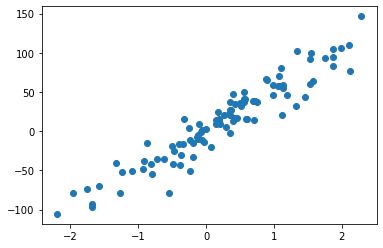

In [ ]:
x,y = make_regression(n_samples=100,n_features=2,noise=10)
plt.scatter(x[:,0],y)

In [ ]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [ ]:
#matrice X
X=np.hstack((x,np.ones((x.shape[0],1))))
X.shape 
X[:10]

array([[-0.37778916, -1.23804103,  1.        ],
       [ 1.10171216,  0.90186612,  1.        ],
       [-1.24529737,  0.34639758,  1.        ],
       [ 0.98247589, -0.50476673,  1.        ],
       [ 1.75186426,  0.38317114,  1.        ],
       [-1.3353484 ,  0.80914596,  1.        ],
       [-0.12731449, -0.62635763,  1.        ],
       [ 1.53583941, -0.88641306,  1.        ],
       [ 0.34922837,  1.34441633,  1.        ],
       [-0.48437924, -0.51780678,  1.        ]])

In [ ]:
theta=np.random.randn(3,1)
theta

array([[-0.75185654],
       [ 0.4029458 ],
       [ 1.01083062]])

### modele

In [ ]:
def model(X,theta):
    return X.dot(theta)

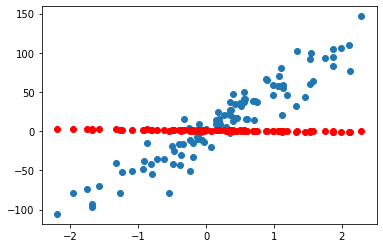

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,theta),c='r')


### Fct coût

In [ ]:
def cost_fct(X,y,theta):
    m=len(y)
    return 1/(2*m) *np.sum((model(X,theta)-y)**2)

In [ ]:
cost_fct(X,y,theta)

1418.5487536517985

### Gradient & Descente de Grad

In [ ]:
def grad(X,y,theta):
     m=len(y)
     return 1/m * X.T.dot(model(X,theta)-y)

In [ ]:
def gradDes(X,y,theta,learning_rate,n_iter):
    cost_history=np.zeros(n_iter)
    for i in range (0,n_iter):
        theta=theta-learning_rate * grad(X,y,theta)
        cost_history[i]=cost_fct(X,y,theta)
    return theta,cost_history

### Machine Learning

In [ ]:
theta_final,cost_history=gradDes(X,y,theta,learning_rate=0.01,n_iter=1000)

In [ ]:
theta_final

array([[50.70279765],
       [14.15248619],
       [ 1.0076072 ]])

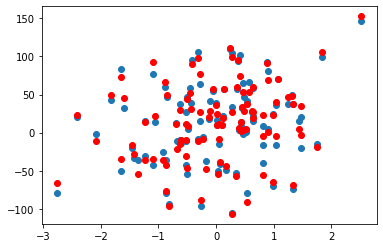

In [ ]:
prediction=model(X,theta_final)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],prediction,c='r')

### courbe d'apprentissage

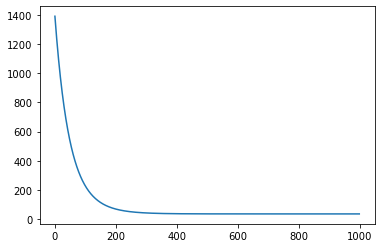

In [ ]:
plt.plot(range(1000),cost_history)

### Le coef de determination

In [ ]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [ ]:
coef_determination(y,prediction)

0.9724964355715824